In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
sns.set_style('white') 
%matplotlib inline 

In [2]:
#Load dataset
ratings = pd.read_csv('reviews_ratings.csv')

In [3]:
#Visualize top 5 rows
ratings.head()

,Unnamed: 0,listing_id,date,reviewer_id,comments,clean_comment,sentiment,score,rating
0,0,2595,2018-04-29,128182033,We really enjoyed our stay at Jennifer’s apart...,stay jennifer apartment hospitable answered qu...,Positive,0.4588,4
1,1,2595,2018-06-06,115721479,Jennifer is very nice and responsive. The loca...,jennifer nice responsive location apt weird sl...,Positive,0.8074,5
2,2,5121,2012-10-30,3588281,"I had the most beautiful stay, \r\nGaron is a ...",beautiful stay special person absolute angel f...,Positive,0.9493,5
3,3,5203,2014-11-24,22508539,What can i say about my trip with these family...,trip family actuallyone word enough describe f...,Positive,0.9571,5
4,4,6848,2009-12-06,44462,We stayed only a (too) short weekend. It was r...,short weekend nice first experience airbnb eve...,Positive,0.9042,5


In [4]:
ratings = ratings.filter(items=['listing_id','reviewer_id','rating'])

In [5]:
ratings

,listing_id,reviewer_id,rating
0,2595,128182033,4
1,2595,115721479,5
2,5121,3588281,5
3,5203,22508539,5
4,6848,44462,5
...,...,...,...
1119311,41897418,115399272,4
1119312,41964752,8183935,2
1119313,42073902,334862228,5
1119314,42099961,221418152,4


In [6]:
ratings.rating.unique()

array([4, 5, 2, 3, 1, 0])

In [7]:
#find rows which has repeated rating for same listing by same reviewer
dup = ratings[ratings.duplicated(subset = ['listing_id','reviewer_id'], keep = False)]

In [8]:
dup

,listing_id,reviewer_id,rating
9,7097,73862254,4
41,27531,4976402,3
42,27531,24487109,4
51,31994,10453897,5
53,33009,26065,5
...,...,...,...
1119028,35267420,24381282,4
1119069,35934018,239891146,5
1119213,38984732,226243692,4
1119271,40264002,263536483,5


In [9]:
#Deleting rows which has repeated rating for same listing by same reviewer
ratings.drop_duplicates(subset = ['listing_id','reviewer_id'], keep =False, inplace = True)

In [10]:
ratings.reset_index(drop=True)

,listing_id,reviewer_id,rating
0,2595,128182033,4
1,2595,115721479,5
2,5121,3588281,5
3,5203,22508539,5
4,6848,44462,5
...,...,...,...
1084828,41850021,154560483,5
1084829,41897418,115399272,4
1084830,41964752,8183935,2
1084831,42073902,334862228,5


In [11]:
#Find average rating for rows which has repeated rating for same listing by same reviewer
av_rating = dup.groupby(['listing_id', 'reviewer_id'])['rating'].mean().reset_index()

In [12]:
av_rating['rating'] = av_rating['rating'].apply(np.ceil)

In [13]:
av_rating

,listing_id,reviewer_id,rating
0,3831,29683774,5.0
1,3831,31838543,5.0
2,3831,125385025,4.0
3,5121,1387678,5.0
4,5178,197711,5.0
...,...,...,...
14424,42156917,106040507,4.0
14425,42298416,302696386,4.0
14426,42300468,30650727,5.0
14427,42312718,156596817,5.0


In [14]:
final_df = pd.concat([ratings,av_rating]).reset_index(drop=True)

In [15]:
final_df

,listing_id,reviewer_id,rating
0,2595,128182033,4.0
1,2595,115721479,5.0
2,5121,3588281,5.0
3,5203,22508539,5.0
4,6848,44462,5.0
...,...,...,...
1099257,42156917,106040507,4.0
1099258,42298416,302696386,4.0
1099259,42300468,30650727,5.0
1099260,42312718,156596817,5.0


In [16]:
final_df.listing_id.unique().shape[0]

39848

In [17]:
final_df.reviewer_id.unique().shape[0]

959173

In [18]:
final_df.drop(final_df[final_df.rating==0].index,inplace = True)

In [19]:
final_df.reset_index(drop=True,inplace=True)

In [20]:
final_df

,listing_id,reviewer_id,rating
0,2595,128182033,4.0
1,2595,115721479,5.0
2,5121,3588281,5.0
3,5203,22508539,5.0
4,6848,44462,5.0
...,...,...,...
1098057,42156917,106040507,4.0
1098058,42298416,302696386,4.0
1098059,42300468,30650727,5.0
1098060,42312718,156596817,5.0


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098062 entries, 0 to 1098061
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   listing_id   1098062 non-null  int64  
 1   reviewer_id  1098062 non-null  int64  
 2   rating       1098062 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 25.1 MB


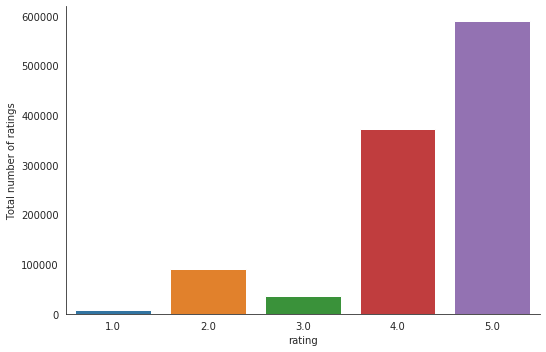

In [22]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot("rating", data=final_df, aspect=1.5,kind='count')
    g.set_ylabels("Total number of ratings")

In [23]:
final_df = final_df[["reviewer_id", "listing_id", "rating"]]

In [25]:
final_df.sort_values(by='reviewer_id')

,reviewer_id,listing_id,rating
774506,1,33709253,5.0
429288,1,6758849,5.0
536327,3,241140,5.0
287447,3,522081,5.0
1075375,29,13536155,3.0
...,...,...,...
948121,340961267,39634804,5.0
422191,340984710,42220178,4.0
405128,340987772,29983923,2.0
65015,340991524,41615675,5.0


In [26]:
final_df.to_csv('Clean_ratings.csv',index=False)